# Análise Exploratória do Mercado Acionário Brasileiro

### Índice.
``df_bovespa_stocks`` (São dados Brutos das Ações)
Ele contém o histórico diário de preços e volumes de negociação de várias ações da bolsa brasileira (B3), desde o começo de 2010 até quase o presente.

**Principais colunas desse dataframe:**

- ``Date (Data):`` A data em que o registro de negociação ocorreu. 
- ``Symbol (Símbolo):`` O código da ação na bolsa. Por exemplo, PETR4 para Petrobras, ITUB4 para Itaú Unibanco. É como o "nome" da ação.
- ``Open (Abertura)``: O preço que a ação começou a ser negociada naquele dia.
- ``High (Máxima)``: O preço mais alto que a ação atingiu durante aquele dia.
- ``Low (Mínima)``: O preço mais baixo que a ação atingiu durante aquele dia.
- ``Close (Fechamento)``: O preço que a ação terminou o dia de negociação.
- ``Adj Close (Fechamento Ajustado)``: Este é o preço de fechamento que foi ajustado para considerar eventos como dividendos (quando a empresa distribui lucros aos acionistas) e splits (quando a empresa divide suas ações). Ele dá uma visão mais verdadeira do retorno para o investidor ao longo do tempo. É o que usamos para calcular retornos.
- ``Volume (Volume):`` A quantidade total de ações negociadas naquele dia. Um volume alto pode indicar grande interesse (compra ou venda) na ação.

- ``df_precos_ajustados`` (A Tabela Focada nos Preços que Nos Interessam)
Este DataFrame foi criado a partir do df_bovespa_stocks. Ele pega apenas as ações que escolhemos durante a analise (PETR4, BBAS3, ITUB4, VALE5) e organiza os dados de uma forma que: cada ação vira uma coluna, e as datas são as linhas (o índice).

bovestocks.csv (o dataset das ações individuais)
economic_indicators.csv (os indicadores macroeconômicos)

In [1]:
import pandas as pd

# Para economic_indicators.csv
df_econ = pd.read_csv('economic_indicators.csv')

# Para bovespa_indexes.csv
df_bovespa = pd.read_csv('bovespa_indexes.csv')

# para bovespa_stocks
df_bovespa_stocks = pd.read_csv ('bovespa_stocks.csv')

In [2]:
# Para bovespa_stocks
print("--- df_bovespa_stocks.head() ---")
print(df_bovespa_stocks.head())
print("\n--- df_bovespa_stocks.info() ---")
print(df_bovespa_stocks.info())
print("\n--- df_bovespa_stocks.describe() ---")
print(df_bovespa_stocks.describe())
print("\n--- df_bovespa_stocks.isnull().sum() ---")
print(df_bovespa_stocks.isnull().sum())

print("\n\n" + "="*50 + "\n\n") # Para separar a saída

# Para economic_indicators.csv
print("--- df_econ.head() ---")
print(df_econ.head())
print("\n--- df_econ.info() ---")
print(df_econ.info())
print("\n--- df_econ.describe() ---")
print(df_econ.describe())
print("\n--- df_econ.isnull().sum() ---")
print(df_econ.isnull().sum())

print("\n\n" + "="*50 + "\n\n") # Para separar a saída

# Para bovespa_indexes.csv
print("--- df_bovespa.head() ---")
print(df_bovespa.head())
print("\n--- df_bovespa.info() ---")
print(df_bovespa.info())
print("\n--- df_bovespa.describe() ---")
print(df_bovespa.describe())
print("\n--- df_bovespa.isnull().sum() ---")
print(df_bovespa.isnull().sum())

--- df_bovespa_stocks.head() ---
         Date  Symbol    Adj Close        Close         High          Low  \
0  2022-10-03  SMAB11     8.360000     8.360000     8.370000     7.970000   
1  2010-01-04   MMXM3  1599.174927  1599.174927  1599.174927  1555.137817   
2  2010-01-05   MMXM3  1609.240479  1609.240479  1616.789795  1567.719849   
3  2010-01-06   MMXM3  1680.958008  1680.958008  1685.990845  1599.174927   
4  2010-01-07   MMXM3  1698.572876  1698.572876  1704.863892  1641.953735   

          Open   Volume  
0     8.000000    579.0  
1  1556.395996  20984.0  
2  1600.433105  22586.0  
3  1616.789795  37998.0  
4  1660.826782  33651.0  

--- df_bovespa_stocks.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031282 entries, 0 to 1031281
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1031282 non-null  object 
 1   Symbol     1031282 non-null  object 
 2   Adj Close  1031282 non-null  

In [3]:
df_bovespa_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2022-10-03,SMAB11,8.360000,8.360000,8.370000,7.970000,8.000000,579.0
1,2010-01-04,MMXM3,1599.174927,1599.174927,1599.174927,1555.137817,1556.395996,20984.0
2,2010-01-05,MMXM3,1609.240479,1609.240479,1616.789795,1567.719849,1600.433105,22586.0
3,2010-01-06,MMXM3,1680.958008,1680.958008,1685.990845,1599.174927,1616.789795,37998.0
4,2010-01-07,MMXM3,1698.572876,1698.572876,1704.863892,1641.953735,1660.826782,33651.0


In [4]:
import pandas as pd

# --- Para o DataFrame de Ações (df_bovespa_stocks) ---

try:
    df_bovespa_stocks = pd.read_csv('bovespa_stocks.csv') 

    print("--- Verificando df_bovespa_stocks antes do tratamento ---")
    print(df_bovespa_stocks.head())
    print(df_bovespa_stocks.info()) 

    if 'Date' in df_bovespa_stocks.columns:
        print("\n--- Coluna 'Date' encontrada. Tentando converter para datetime... ---")
        
        df_bovespa_stocks['Date'] = pd.to_datetime(df_bovespa_stocks['Date'], format='mixed', utc=True)
        
        print("\n--- Definindo 'Date' como índice e ordenando... ---")
        df_bovespa_stocks.set_index('Date', inplace=True)
        df_bovespa_stocks.sort_index(inplace=True)
        
        print("\n--- df_bovespa_stocks - Resultados após tratamento ---")
        # Verificando se o índice é do tipo DatetimeIndex
        if isinstance(df_bovespa_stocks.index, pd.DatetimeIndex):
            print("SUCESSO! A coluna 'Date' é agora o índice do DataFrame e é do tipo datetime!")
            print(f"Tipo do índice: {df_bovespa_stocks.index.dtype}")
            print(f"Primeiros valores do índice: {df_bovespa_stocks.index[:5]}")
            print(f"Últimos valores do índice: {df_bovespa_stocks.index[-5:]}")
            print(f"Data Mínima (df_bovespa_stocks): {df_bovespa_stocks.index.min()}")
            print(f"Data Máxima (df_bovespa_stocks): {df_bovespa_stocks.index.max()}")
        else:
            print("AVISO: A coluna 'Date' NÃO foi definida como índice de data ou não é do tipo datetime.")
            print(f"Tipo do índice atual: {df_bovespa_stocks.index.dtype}")

    else:
        print("ERRO: A coluna 'Date' NÃO foi encontrada no DataFrame df_bovespa_stocks.")
    
    print(f"\nSímbolos de Ações (df_bovespa_stocks): {df_bovespa_stocks['Symbol'].unique()}")
    print("\n--- df_bovespa_stocks.head() FINAL (com Data como índice) ---")
    print(df_bovespa_stocks.head())

except FileNotFoundError:
    print("ERRO CRÍTICO: O arquivo 'bovespa_stocks.csv' não foi encontrado. Por favor, verifique o nome do arquivo e o diretório.")
except Exception as e:
    print(f"OCORREU UM ERRO INESPERADO ao processar df_bovespa_stocks: {e}")

--- Verificando df_bovespa_stocks antes do tratamento ---
         Date  Symbol    Adj Close        Close         High          Low  \
0  2022-10-03  SMAB11     8.360000     8.360000     8.370000     7.970000   
1  2010-01-04   MMXM3  1599.174927  1599.174927  1599.174927  1555.137817   
2  2010-01-05   MMXM3  1609.240479  1609.240479  1616.789795  1567.719849   
3  2010-01-06   MMXM3  1680.958008  1680.958008  1685.990845  1599.174927   
4  2010-01-07   MMXM3  1698.572876  1698.572876  1704.863892  1641.953735   

          Open   Volume  
0     8.000000    579.0  
1  1556.395996  20984.0  
2  1600.433105  22586.0  
3  1616.789795  37998.0  
4  1660.826782  33651.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031282 entries, 0 to 1031281
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1031282 non-null  object 
 1   Symbol     1031282 non-null  object 
 2   Adj Close  1031282 non-null  float64
 

#### Vamos trabalhar com as seguintes ações e observar padrões e tendências:

PETR4 (Petrobras PN)
VALE5 (Vale ON)
ITUB4 (Itaú Unibanco PN)
BBAS3 (Banco do Brasil ON)

* Primeiro vamos filtrar o dataframe ```df_bovespa_stocks``` para que ele contenha somente os dados das ações que escolhemos. Depois nós vamos calcular os **retornos diários**, que são essenciais para qualquer analise finaceira.

In [5]:
import numpy as np

# 1. Definindo as ações selecionadas:
acoes_selecionadas = ['PETR4', 'VALE5', 'ITUB4', 'BBAS3']

# 2. filtrando o df original com somente as ações selecionadas
# usamos .locpara filtrar por 'symbol' e selecionamos as colunas que nos interessa
df_analise_acoes = df_bovespa_stocks.loc[df_bovespa_stocks['Symbol'].isin(acoes_selecionadas), ['Symbol', 'Adj Close', 'Close', 'Volume']]

# 3. Pivotando o DataFrame para que cada coluna seja o 'Adj Close' de uma ação
# Isso facilita muito a comparação e o cálculo de retornos
df_precos_ajustados = df_analise_acoes.pivot_table(index='Date', columns='Symbol', values='Adj Close')

# O resultado pode ter alguns NaN onde não houve negociação de uma ação específica em um dia.
# A gente preenche esses NaNs com o valor do dia anterior (forward fill) ou remover as linhas,
# mas para retornos diários, o ideal é que não haja NaNs seguidos.

print("\n--- Verificando NaNs após o pivot (se houver) ---")
print(df_precos_ajustados.isnull().sum())

# 4. Calculando os Retornos Diários (log-retornos para finanças são comuns)
# log(Preço_hoje / Preço_ontem)
# .pct_change() para calcular a variação percentual e depois np.log()
df_retornos_diarios = np.log(1 + df_precos_ajustados.pct_change())

# As primeiras linhas de retornos serão NaN, o que é esperado (pq não há dia anterior para comparar)
print("\n--- Primeiras linhas dos Preços Ajustados ---")
print(df_precos_ajustados.head())

print("\n--- Primeiras linhas dos Retornos Diários ---")
print(df_retornos_diarios.head())

print("\n--- Descritivo Estatístico dos Retornos Diários ---")
print(df_retornos_diarios.describe())


--- Verificando NaNs após o pivot (se houver) ---
Symbol
BBAS3      71
ITUB4      71
PETR4      71
VALE5    1329
dtype: int64

--- Primeiras linhas dos Preços Ajustados ---
Symbol                         BBAS3      ITUB4      PETR4      VALE5
Date                                                                 
2010-01-04 00:00:00+00:00  13.213037  11.146399  15.792297  30.510864
2010-01-05 00:00:00+00:00  13.080458  11.218633  15.656882  30.938519
2010-01-06 00:00:00+00:00  13.098141  11.121388  15.868464  31.548458
2010-01-07 00:00:00+00:00  13.102555  11.007490  15.720360  31.758785
2010-01-08 00:00:00+00:00  13.177686  10.840791  15.635726  31.934046

--- Primeiras linhas dos Retornos Diários ---
Symbol                        BBAS3     ITUB4     PETR4     VALE5
Date                                                             
2010-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN
2010-01-05 00:00:00+00:00 -0.010085  0.006459 -0.008612  0.013919
2010-01-06 00:00:00+00:00

C:\Users\mnasc\AppData\Local\Temp\ipykernel_7432\14952902.py:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_retornos_diarios = np.log(1 + df_precos_ajustados.pct_change())


##### Agora temos as 4 ações que queríamos: BBAS3, ITUB4, PETR4 e VALE5.
Vamos analisar o que aconteceu agora:

NaNs após o pivot:

BBAS3: 71 NaNs
ITUB4: 71 NaNs
PETR4: 71 NaNs
VALE5: 1329 NaNs
Os 71 NaNs para BBAS3, ITUB4 e PETR4 provavelmente são dias em que a bolsa não abriu para negociação em geral (feriados, fins de semana, etc.), e como essas ações têm histórico completo nesse período, o pivot_table acaba criando essas lacunas.

Para VALE5, o número de 1329 NaNs é significativamente maior. Isso pode indicar que a VALE5 tem um período de dados menor no dataset, ou que há mais lacunas em seu histórico específico. Isso é normal em dados de mercado.

#### Ajuste e Visualização 📈📊
Vamos fazer um ajuste no **cálculo dos retornos** para lidar com esses NaNs de forma mais robusta e depois vamos para os gráficos.


--- Primeiras linhas dos Retornos Diários (após limpeza e ajuste) ---
Symbol                        BBAS3     ITUB4     PETR4     VALE5
Date                                                             
2010-01-05 00:00:00+00:00 -0.010085  0.006459 -0.008612  0.013919
2010-01-06 00:00:00+00:00  0.001351 -0.008706  0.013423  0.019523
2010-01-07 00:00:00+00:00  0.000337 -0.010294 -0.009377  0.006645
2010-01-08 00:00:00+00:00  0.005718 -0.015260 -0.005398  0.005503
2010-01-11 00:00:00+00:00  0.007683 -0.008751 -0.003253  0.004381

--- Descritivo Estatístico dos Retornos Diários (após limpeza e ajuste) ---
Symbol        BBAS3        ITUB4        PETR4        VALE5
count   3596.000000  3596.000000  3596.000000  3596.000000
mean       0.000220     0.000317     0.000242     0.000025
std        0.028585     0.020117     0.029703     0.018278
min       -0.702491    -0.198015    -0.352367    -0.122123
25%       -0.011954    -0.010405    -0.012904    -0.000867
50%        0.000000     0.000000    

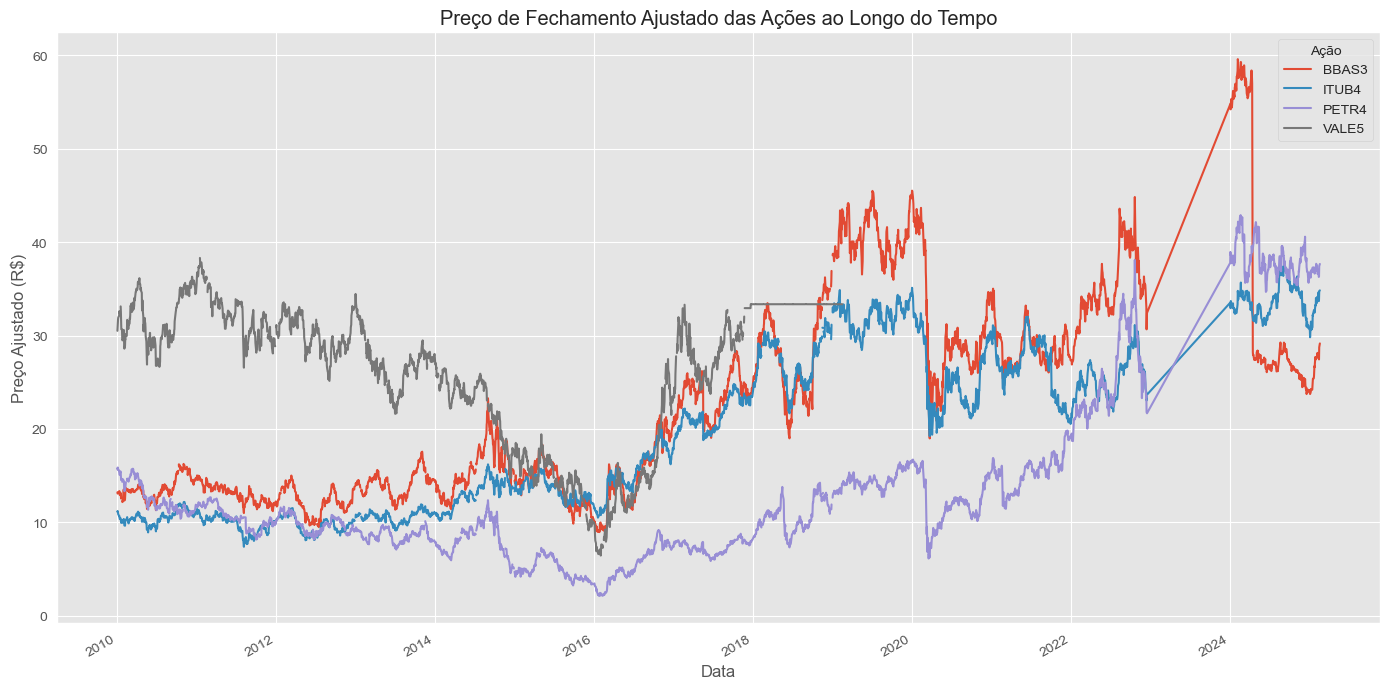

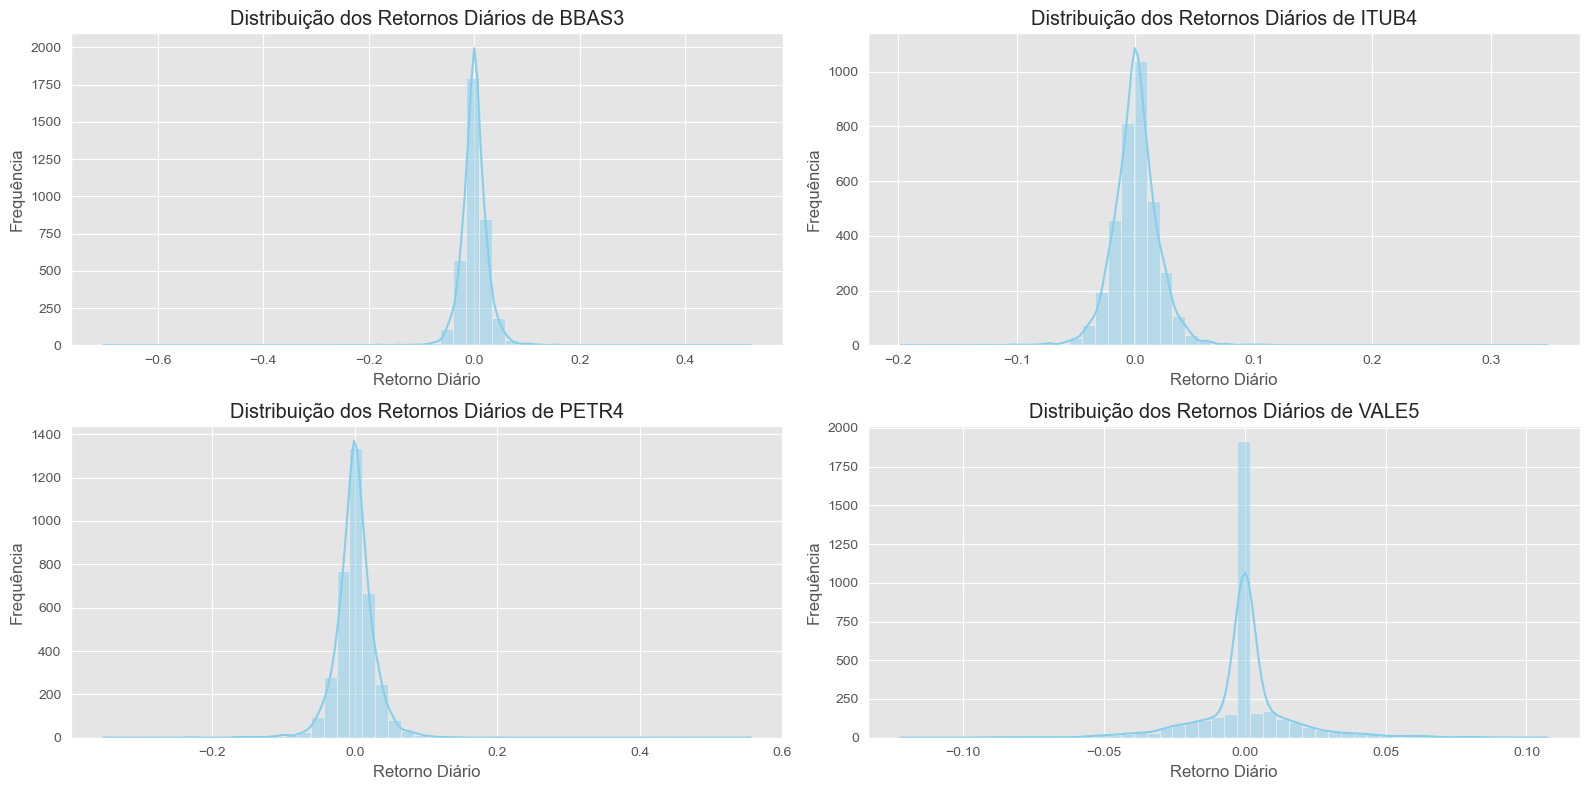

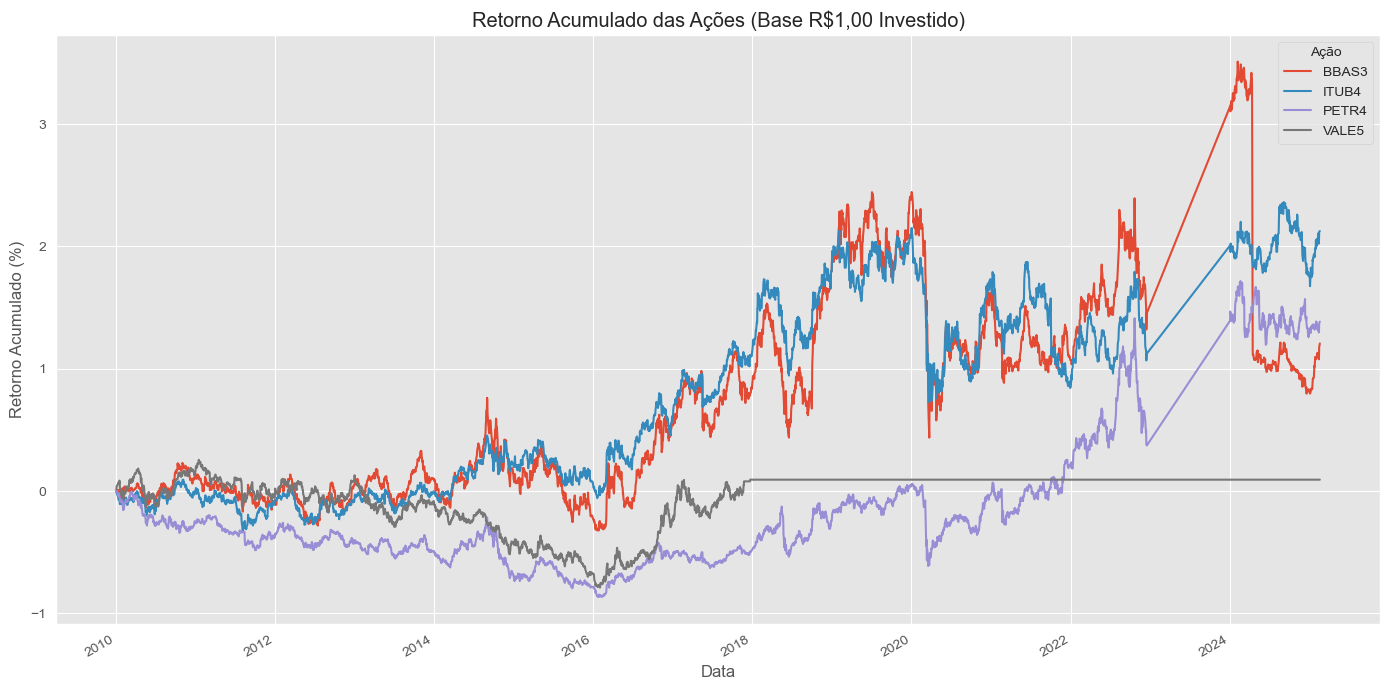

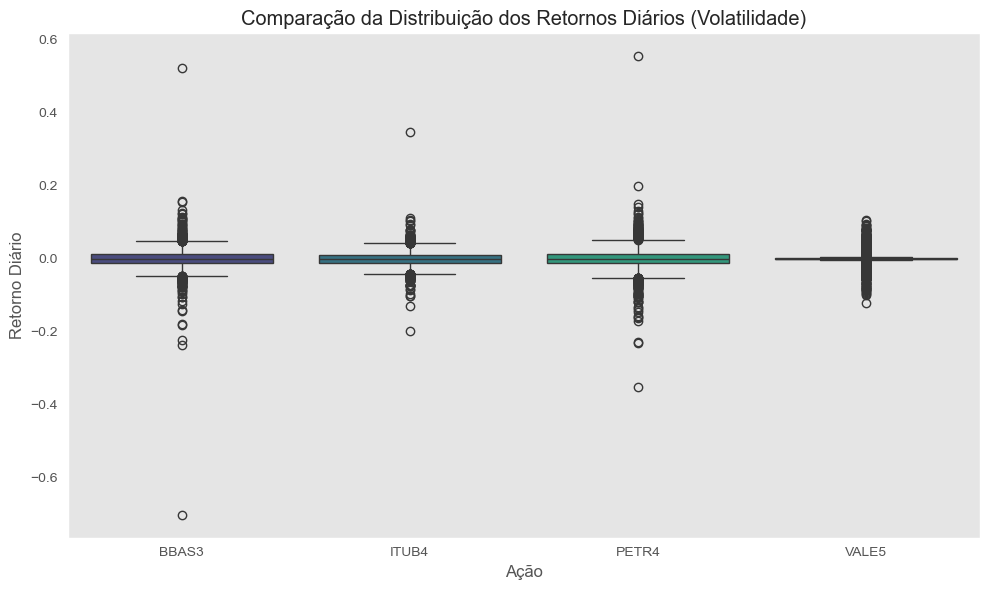

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# ajustando o estilo dos gráficos
sns.set_style("whitegrid")
plt.style.use('ggplot') # Um estilo clássico e limpo

# Antes vamos garantir que temos os preços ajustados sem NaNs
# Usamos .ffill() para preencher NaNs com o valor anterior 
# e .bfill() para preencher as NaNs iniciais (se houver)
df_precos_ajustados_limpo = df_precos_ajustados.ffill().bfill()

# 4. Calculando os Retornos Diários (log-retornos)
# Adicionando fill_method=None para silenciar o FutureWarning
df_retornos_diarios = np.log(1 + df_precos_ajustados_limpo.pct_change(fill_method=None))

# Remover a primeira linha de NaNs, que é esperada após o pct_change()
df_retornos_diarios = df_retornos_diarios.dropna()

print("\n--- Primeiras linhas dos Retornos Diários (após limpeza e ajuste) ---")
print(df_retornos_diarios.head())

print("\n--- Descritivo Estatístico dos Retornos Diários (após limpeza e ajuste) ---")
print(df_retornos_diarios.describe())

# --- GERAÇÃO DOS GRÁFICOS ---

# 1. Visualizar a Série Temporal dos Preços Ajustados
plt.figure(figsize=(14, 7))
df_precos_ajustados.plot(ax=plt.gca())
plt.title('Preço de Fechamento Ajustado das Ações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado (R$)')
plt.legend(title='Ação')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Visualizar a Distribuição dos Retornos Diários (Histogramas)
plt.figure(figsize=(16, 8))
for i, col in enumerate(df_retornos_diarios.columns):
    plt.subplot(2, 2, i + 1) # Cria subplots para cada ação
    sns.histplot(df_retornos_diarios[col], bins=50, kde=True, color='skyblue') # dropna() não é mais necessário aqui
    plt.title(f'Distribuição dos Retornos Diários de {col}')
    plt.xlabel('Retorno Diário')
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# 3. Calcular e Visualizar os Retornos Acumulados
# Para log-retornos, a soma dos log-retornos é o log do retorno acumulado
# E como já removemos os NaNs da primeira linha, a soma acumulada funciona bem
df_retorno_acumulado = np.exp(df_retornos_diarios.cumsum()) - 1

plt.figure(figsize=(14, 7))
df_retorno_acumulado.plot(ax=plt.gca())
plt.title('Retorno Acumulado das Ações (Base R$1,00 Investido)')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado (%)')
plt.legend(title='Ação')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Box plot para comparar a volatilidade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_retornos_diarios, palette='viridis')
plt.title('Comparação da Distribuição dos Retornos Diários (Volatilidade)')
plt.xlabel('Ação')
plt.ylabel('Retorno Diário')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### analisando o que cada gráfico nos mostra:
**1. Preço de Fechamento Ajustado das Ações ao Longo do Tempo:** 

- ``PETR4 e BBAS3:`` Vemos uma volatilidade bem grande, com altos e baixos significativos. A Petrobras (PETR4) em particular mostra picos e vales acentuados, refletindo bem o impacto de notícias e do cenário global sobre a empresa. O Banco do Brasil (BBAS3) também oscila, mas talvez com um pouco menos de amplitude que PETR4.

- ``ITUB4:`` Parece ser a mais "estável" ou com menor volatilidade entre as quatro, com uma tendência de crescimento mais gradual e menos picos e quedas abruptas.
VALE5: Apresenta um comportamento interessante, com períodos de crescimento forte e outros de lateralização ou queda, refletindo o preço das commodities.

**2. Distribuição dos Retornos Diários (Histogramas):**

Todos os histogramas mostram uma concentração de retornos próximos de zero, o que é esperado (a maioria dos dias as ações não têm variações gigantescas).
As "caudas" mais longas (barras mais distantes do zero, tanto positivas quanto negativas) indicam dias com retornos extremos. PETR4 e BBAS3 parecem ter caudas mais proeminentes, o que confirma a maior volatilidade que vimos no gráfico de preços. **ITUB4 e VALE5** têm distribuições um pouco mais "estreitas" perto do centro, indicando variações diárias geralmente menores.
A forma dos histogramas, que lembra um sino, é comum para retornos diários, embora geralmente com caudas mais "gordas" do que uma distribuição normal perfeita.

**3. Retorno Acumulado das Ações (Base R$1,00 Investido):**

Este gráfico é o mais impactante para mostrar desempenho.
- ``ITUB4 e BBAS3:`` Parecem ter entregado retornos acumulados consistentes e positivos ao longo do tempo, transformando aquele "R$1" inicial em um valor bem maior.
VALE5: Teve um bom desempenho, mas com períodos de estagnação ou queda, especialmente em comparação com os bancos em certos momentos.
PETR4: Começa junto com as outras, mas mostra uma trajetória mais errática e, em alguns momentos, um desempenho acumulado inferior em comparação aos bancos ao longo do período, embora com picos notáveis.

**4. Comparação da Distribuição dos Retornos Diários (Box Plot - Volatilidade):**

As "caixas" (box) e os "bigodes" (whiskers) confirmam o que já observamos.
As caixas de PETR4 e BBAS3 são visivelmente mais "altas" (maior amplitude), indicando uma maior dispersão dos retornos diários, ou seja, maior volatilidade.
ITUB4 tem a caixa mais compacta, mostrando menor volatilidade.
VALE5 está entre os bancos e Petrobras em termos de volatilidade.
Os pontos fora dos "bigodes" são os outliers, que representam aqueles dias de retornos diários extremamente altos ou baixos. E vemos que PETR4 e BBAS3 têm outliers mais extremos.

In [7]:

# --- Exploração e Preparação do df_econ (Indicadores Econômicos) ---

print("--- Informações sobre df_econ ---")
# df_econ: é o DataFrame com os indicadores econômicos (Selic, IPCA, etc.).
# .head() mostra as 5 primeiras linhas do DataFrame. 
print(df_econ.head())

print("\n--- df_econ.info() ---")
# .info() fornece um resumo técnico do DataFrame:
# - Quantas linhas e colunas ele tem.
# - O nome de cada coluna.
# - Quantos valores não-nulos (non-null) existem em cada coluna (isso ajuda a ver NaNs!).
# - O tipo de dado (Dtype) de cada coluna (ex: int, float, object - que é texto, datetime).
# - O uso de memória do DataFrame.
print(df_econ.info())

print("\n--- Contagem de NaNs em df_econ ---")
# .isnull() cria um DataFrame de True/False, onde True significa que o valor é NaN (ausente).
# .sum() então soma todos os True por coluna (já que True é 1 e False é 0),
# nos dizendo quantos NaNs existem em cada coluna.
print(df_econ.isnull().sum())

print("\n--- Período do df_econ ---")
# Como definimos 'Date' como índice e ele é um DatetimeIndex:
# .index.min() retorna a data mais antiga presente no índice (neste caso, a data mais antiga do dado).
# .index.max() retorna a data mais recente.

print(f"Data Mínima (df_econ): {df_econ.index.min()}")
print(f"Data Máxima (df_econ): {df_econ.index.max()}")

# --- Tratando NaNs em df_econ (Preenchimento) ---

# Por que preencher NaNs?
# Muitos indicadores econômicos, como IPCA e Desemprego, são divulgados mensalmente ou trimestralmente.
# No entanto, nosso DataFrame de ações tem dados diários.
# Se simplesmente juntarmos, teríamos muitos NaNs nos dias em que não há divulgação do indicador.
# Para uma análise diária, podemos "espalhar" o último valor válido para os dias seguintes até a próxima divulgação.

print("\n--- Preenchendo NaNs em df_econ com o último valor válido ---")
# .ffill() (forward fill): Preenche os valores NaN com o último valor válido *anterior* na mesma coluna.
# Ex: Se em 05/01 o IPCA é NaN e em 04/01 ele tinha um valor, o 05/01 receberá o valor de 04/01.
# .bfill() (backward fill): Preenche os valores NaN com o primeiro valor válido *posterior* na mesma coluna.
# Usamos .bfill() depois do .ffill() para preencher quaisquer NaNs que possam ter sobrado no *início* do DataFrame (se a primeira data de uma coluna fosse NaN).
df_econ_preenchido = df_econ.ffill().bfill()
print(df_econ_preenchido.head())

print("\n--- Contagem de NaNs em df_econ após preenchimento ---")
# Verificando novamente pra ter certeza que não sobrou nenhum NaN nas colunas que queria preencher.
print(df_econ_preenchido.isnull().sum())

# --- Unindo os DataFrames (df_retornos_diarios e df_econ_preenchido) ---

# Para analisar a relação entre retornos de ações e indicadores econômicos,
# a gente precisa que eles estejam no mesmo DataFrame e alinhados pela data.
# O 'index' de ambos os DataFrames são as datas.

# .merge() é uma função do Pandas para combinar DataFrames.
# left_index=True: Indica que o índice do DataFrame 'da esquerda' (df_retornos_diarios) será usado para a união.
# right_index=True: Indica que o índice do DataFrame 'da direita' (df_econ_preenchido) será usado para a união.
# how='inner': Define o tipo de união. 'inner' significa que apenas as datas que existem em *ambos* os DataFrames serão mantidas.
# Isso vai garantir que teremos retornos de ações E indicadores econômicos para a mesma data.
df_combinado = pd.merge(df_retornos_diarios, df_econ_preenchido,
                        left_index=True, right_index=True, how='inner')

print("\n--- Primeiras linhas do DataFrame Combinado ---")
# Mostra as primeiras linhas do novo df que contém tanto os retornos das ações
# quanto os indicadores econômicos para as mesmas datas.
print(df_combinado.head())

print("\n--- Últimas linhas do DataFrame Combinado ---")
# Mostra as últimas linhas para ter uma ideia do final do período combinado.
print(df_combinado.tail())

print("\n--- df_combinado.info() ---")
#  resumo do DataFrame combinado para verificar se os tipos de dados
# estão corretos e se não há NaNs inesperados após a união.
print(df_combinado.info())

--- Informações sobre df_econ ---
         Date  Taxa Selic  IPCA  IGP-M  INPC  Desemprego PNADC
0  2010-01-01        8.75  0.75   0.63  0.88               NaN
1  2010-01-02        8.75   NaN    NaN   NaN               NaN
2  2010-01-03        8.75   NaN    NaN   NaN               NaN
3  2010-01-04        8.75   NaN    NaN   NaN               NaN
4  2010-01-05        8.75   NaN    NaN   NaN               NaN

--- df_econ.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537 entries, 0 to 5536
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5537 non-null   object 
 1   Taxa Selic        5537 non-null   float64
 2   IPCA              181 non-null    float64
 3   IGP-M             181 non-null    float64
 4   INPC              181 non-null    float64
 5   Desemprego PNADC  154 non-null    float64
dtypes: float64(5), object(1)
memory usage: 259.7+ KB
None

--- Contagem de NaNs e

In [8]:
# --- Corrigindo e Preparando o df_econ (Indicadores Econômicos) ---

print("\n\n" + "="*50 + "\n\n")
print("--- Recarregando e Corrigindo df_econ ---")

try:
    df_econ = pd.read_csv('economic_indicators.csv') 

    # Verificando se a coluna 'Date' existe
    if 'Date' in df_econ.columns:
        # Converter para datetime (com utc=True e format='mixed' )
        df_econ['Date'] = pd.to_datetime(df_econ['Date'], format='mixed', utc=True)
        
        # Definir 'Date' como índice
        df_econ.set_index('Date', inplace=True)
        
        # Ordenar pelo índice de data
        df_econ.sort_index(inplace=True)
        
        print("\n--- df_econ após correção (head e info) ---")
        print(df_econ.head())
        print(df_econ.info())

        # Verificando novamente os NaNs após a correção do índice
        print("\n--- Contagem de NaNs em df_econ (após set_index e ordenação) ---")
        print(df_econ.isnull().sum())
        
        # Preenchendo NaNs com o último valor válido 
        df_econ_preenchido = df_econ.ffill().bfill() 
        print("\n--- Contagem de NaNs em df_econ após preenchimento final ---")
        print(df_econ_preenchido.isnull().sum())

        # Período do df_econ ( com as datas corretas)
        print("\n--- Período do df_econ (corrigido) ---")
        print(f"Data Mínima (df_econ): {df_econ_preenchido.index.min()}")
        print(f"Data Máxima (df_econ): {df_econ_preenchido.index.max()}")

    else:
        print("ERRO: A coluna 'Date' NÃO foi encontrada no DataFrame df_econ.")

except FileNotFoundError:
    print("ERRO CRÍTICO: O arquivo 'economic_indicators.csv' não foi encontrado. Por favor, verifique o nome do arquivo e o diretório.")
except Exception as e:
    print(f"OCORREU UM ERRO INESPERADO ao processar df_econ: {e}")


# --- UNINDO OS DATAFRAMES  ---

if 'df_econ_preenchido' in locals() and isinstance(df_econ_preenchido.index, pd.DatetimeIndex):
    print("\n\n" + "="*50 + "\n\n")
    print("--- Tentando unir df_retornos_diarios com df_econ_preenchido (ÍNDICES DE DATA) ---")
    df_combinado = pd.merge(df_retornos_diarios, df_econ_preenchido,
                            left_index=True, right_index=True, how='inner')

    print("\n--- Primeiras linhas do DataFrame Combinado (AGORA COM DADOS!) ---")
    print(df_combinado.head())
    print("\n--- Últimas linhas do DataFrame Combinado ---")
    print(df_combinado.tail())
    print("\n--- df_combinado.info() ---")
    print(df_combinado.info())
    print(f"\nShape do DataFrame Combinado: {df_combinado.shape}")
else:
    print("\nAVISO: df_econ_preenchido não está pronto para a união. Verifique os erros acima.")





--- Recarregando e Corrigindo df_econ ---

--- df_econ após correção (head e info) ---
                           Taxa Selic  IPCA  IGP-M  INPC  Desemprego PNADC
Date                                                                      
2010-01-01 00:00:00+00:00        8.75  0.75   0.63  0.88               NaN
2010-01-02 00:00:00+00:00        8.75   NaN    NaN   NaN               NaN
2010-01-03 00:00:00+00:00        8.75   NaN    NaN   NaN               NaN
2010-01-04 00:00:00+00:00        8.75   NaN    NaN   NaN               NaN
2010-01-05 00:00:00+00:00        8.75   NaN    NaN   NaN               NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5537 entries, 2010-01-01 00:00:00+00:00 to 2025-02-27 00:00:00+00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Taxa Selic        5537 non-null   float64
 1   IPCA              181 non-null    float64
 2   IGP-M             181 non-null    flo


--- Calculando a Matriz de Correlação ---
                     BBAS3     ITUB4     PETR4     VALE5  Taxa Selic  \
BBAS3             1.000000  0.690883  0.583455  0.228219    0.006628   
ITUB4             0.690883  1.000000  0.575710  0.269922    0.010860   
PETR4             0.583455  0.575710  1.000000  0.326360   -0.004590   
VALE5             0.228219  0.269922  0.326360  1.000000    0.006891   
Taxa Selic        0.006628  0.010860 -0.004590  0.006891    1.000000   
IPCA             -0.006370 -0.017298 -0.019877 -0.034933    0.025695   
IGP-M            -0.003370 -0.006476  0.002290 -0.012917   -0.404229   
INPC             -0.011915 -0.022593 -0.021558 -0.042381   -0.002994   
Desemprego PNADC  0.009516  0.002403  0.027046  0.028005   -0.532956   

                      IPCA     IGP-M      INPC  Desemprego PNADC  
BBAS3            -0.006370 -0.003370 -0.011915          0.009516  
ITUB4            -0.017298 -0.006476 -0.022593          0.002403  
PETR4            -0.019877  0.00229

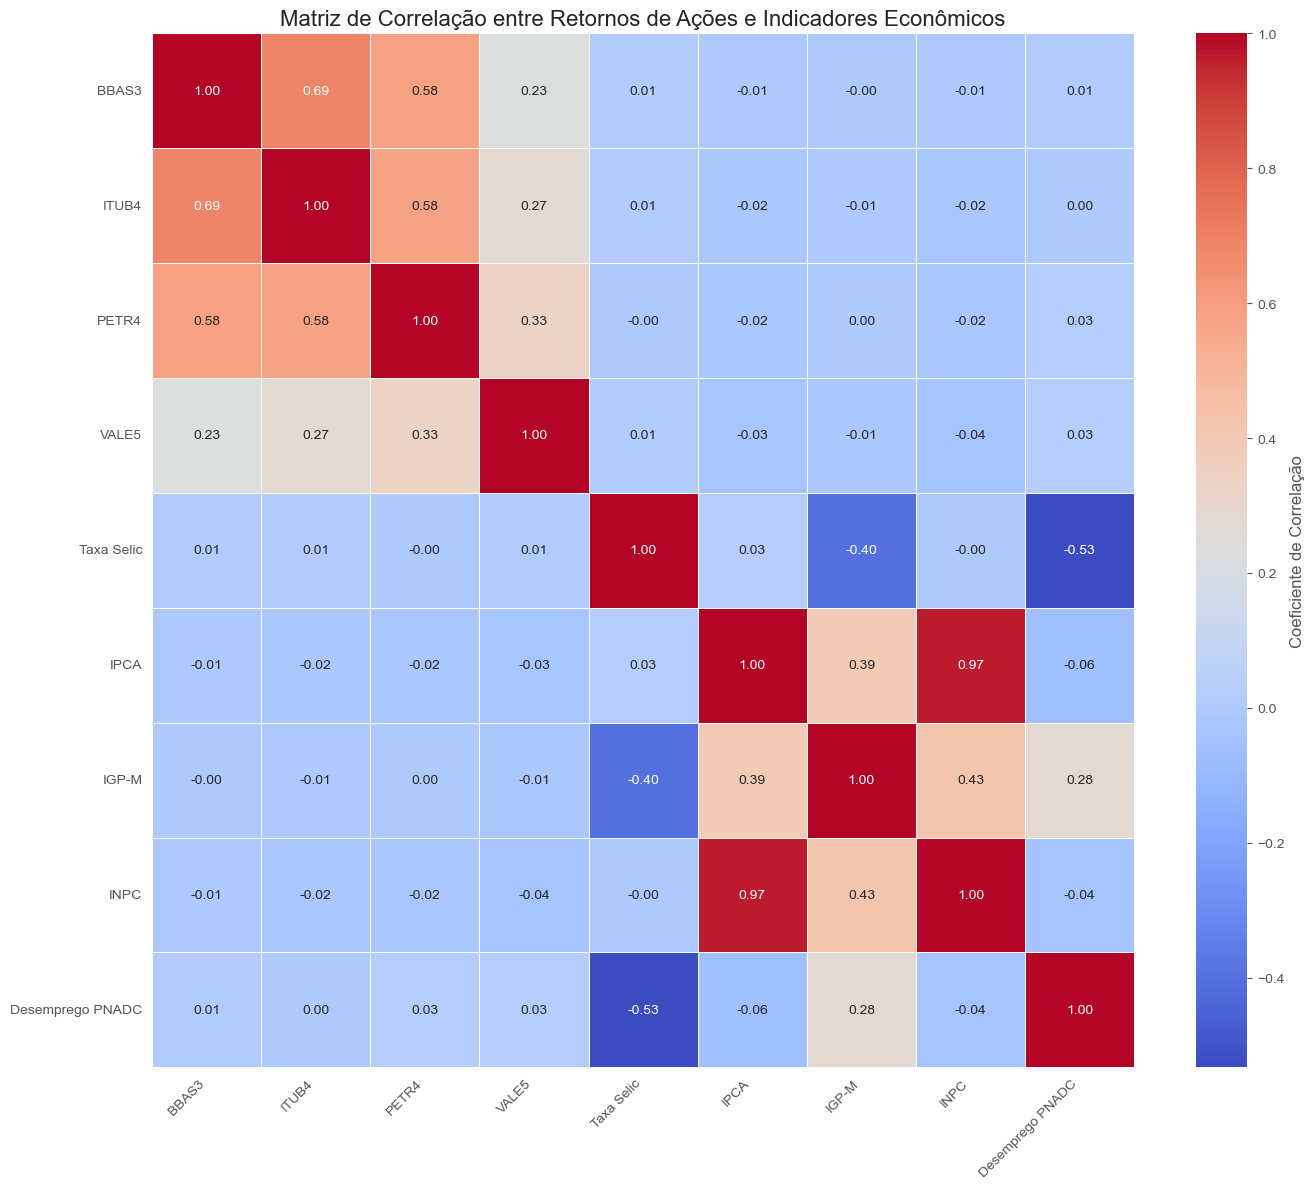


--- Correlação dos Retornos das Ações com os Indicadores Econômicos ---
       Taxa Selic      IPCA     IGP-M      INPC  Desemprego PNADC
BBAS3    0.006628 -0.006370 -0.003370 -0.011915          0.009516
ITUB4    0.010860 -0.017298 -0.006476 -0.022593          0.002403
PETR4   -0.004590 -0.019877  0.002290 -0.021558          0.027046
VALE5    0.006891 -0.034933 -0.012917 -0.042381          0.028005

**Interpretação da Correlação:**
- Valores próximos de 1: Correlação positiva forte (variam na mesma direção).
- Valores próximos de -1: Correlação negativa forte (variam em direções opostas).
- Valores próximos de 0: Pouca ou nenhuma correlação linear.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Reforçando as importações

print("\n--- Calculando a Matriz de Correlação ---")
# Para calcular a correlação (que mede a relação linear entre duas variáveis),
# precisamos que o df não tenha valores ausentes (NaNs), especialmente no cálculo.
# O df_combinado já tem seus NaNs de indicadores preenchidos,
# e os NaNs da primeira linha de retornos já foram tratados.
# O .corr() calcula a correlação de Pearson por padrão, que é a mais comum.
correlation_matrix = df_combinado.corr()

print(correlation_matrix)

# 1. Visualizando a Matriz de Correlação com um Heatmap
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix,
            annot=True,     # Mostra os valores de correlação em cada célula
            cmap='coolwarm', # Escolhe um mapa de cores (coolwarm é ótimo para destacar positivo/negativo)
            fmt=".2f",      # Formata os números com 2 casas decimais
            linewidths=.5,  # Adiciona linhas finas entre as células
            cbar_kws={'label': 'Coeficiente de Correlação'}) # Adiciona um rótulo na barra de cores
plt.title('Matriz de Correlação entre Retornos de Ações e Indicadores Econômicos', fontsize=16) # Título maior
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes das colunas para não ficarem sobrepostos
plt.yticks(rotation=0) # Mantém os nomes das linhas na horizontal
plt.tight_layout() # Ajusta o layout para garantir que tudo caiba na imagem
plt.show()

# --- Análises de Correlações Específicas ---
print("\n--- Correlação dos Retornos das Ações com os Indicadores Econômicos ---")
# Seleciona apenas as linhas das ações e as colunas dos indicadores para uma visualização mais focada
corre_acoes_indicadores = correlation_matrix.loc[['BBAS3', 'ITUB4', 'PETR4', 'VALE5'],
                                                 ['Taxa Selic', 'IPCA', 'IGP-M', 'INPC', 'Desemprego PNADC']]
print(corre_acoes_indicadores)

# texto para ajudar na interpretação
print("\n**Interpretação da Correlação:**")
print("- Valores próximos de 1: Correlação positiva forte (variam na mesma direção).")
print("- Valores próximos de -1: Correlação negativa forte (variam em direções opostas).")
print("- Valores próximos de 0: Pouca ou nenhuma correlação linear.")

### A análise de correlação linear diária não revelou uma relação forte e direta, o que sugere a complexidade das interações entre retornos de ações e indicadores macroeconômicos em curtos prazos, ou a necessidade de explorar outros tipos de correlação e lags.


--- Calculando Retorno Médio Anualizado e Volatilidade Anualizada ---
       Retorno Anualizado  Volatilidade Anualizada
BBAS3            0.055473                 0.453772
ITUB4            0.079864                 0.319345
PETR4            0.060922                 0.471514
VALE5            0.006256                 0.290150


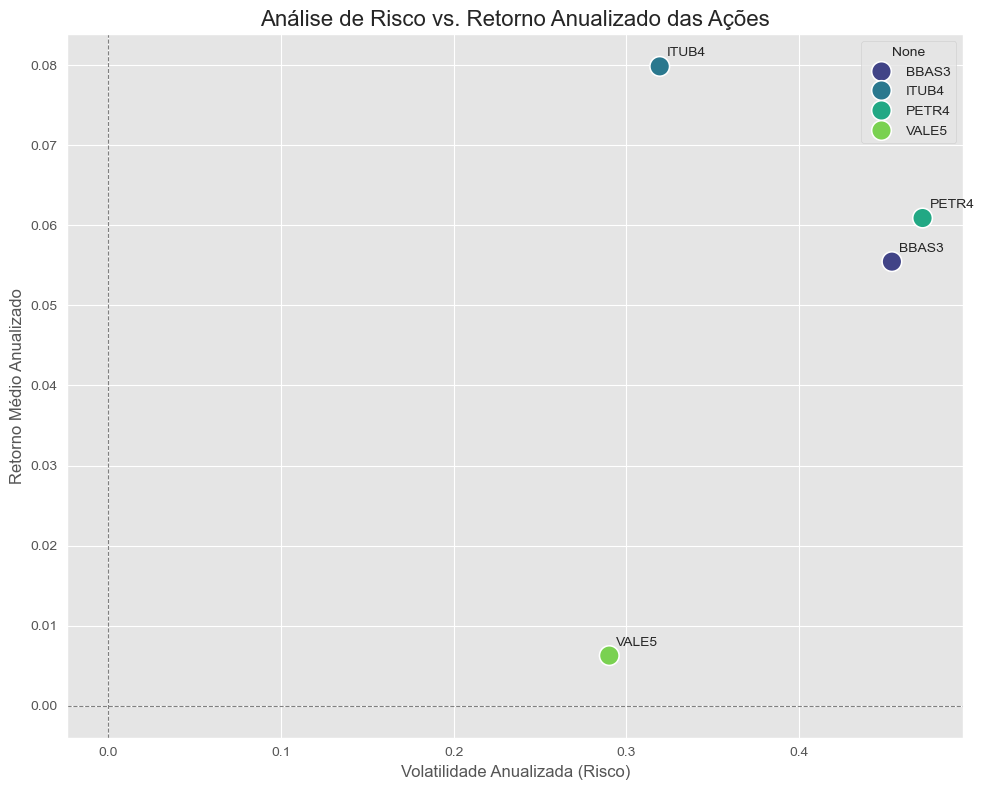

In [10]:
print("\n--- Calculando Retorno Médio Anualizado e Volatilidade Anualizada ---")

# A bolsa geralmente opera cerca de 252 dias úteis por ano.
dias_uteis_ano = 252

# DataFrame para armazenar Risco e Retorno de cada ação
df_risco_retorno = pd.DataFrame()

# Loop pelas colunas de retornos diários (cada coluna é uma ação)
for acao in df_retornos_diarios.columns:
    # Retorno Médio Diário
    retorno_medio_diario = df_retornos_diarios[acao].mean()
    
    # Volatilidade Diária (Desvio Padrão)
    volatilidade_diaria = df_retornos_diarios[acao].std()
    
    # Retorno Médio Anualizado (multiplicamos pelo número de dias úteis no ano)
    retorno_anualizado = retorno_medio_diario * dias_uteis_ano
    
    # Volatilidade Anualizada (multiplicamos pelo número de dias úteis no ano elevado a 0.5, ou seja, raiz quadrada)
    volatilidade_anualizada = volatilidade_diaria * np.sqrt(dias_uteis_ano)
    
    # Armazenar os resultados no nosso novo DataFrame
    df_risco_retorno.loc[acao, 'Retorno Anualizado'] = retorno_anualizado
    df_risco_retorno.loc[acao, 'Volatilidade Anualizada'] = volatilidade_anualizada

print(df_risco_retorno)

# --- Gerando o Gráfico de Dispersão (Scatter Plot) de Risco vs. Retorno ---

plt.figure(figsize=(10, 8)) # Tamanho do gráfico

# sns.scatterplot cria o gráfico de dispersão
# x= 'Volatilidade Anualizada' (eixo horizontal = Risco)
# y= 'Retorno Anualizado' (eixo vertical = Retorno)
# data= df_risco_retorno (nosso DataFrame com os cálculos)
# hue= df_risco_retorno.index (usa o índice do DataFrame para colorir os pontos, que são os símbolos das ações)
# s=200 (tamanho dos pontos)
sns.scatterplot(x='Volatilidade Anualizada',
                y='Retorno Anualizado',
                data=df_risco_retorno,
                hue=df_risco_retorno.index, # Usa o nome da ação como cor
                s=200,                       # Tamanho do ponto
                palette='viridis',           # Paleta de cores
                legend='full')               # Exibe a legenda completa

# Adicionar rótulos para cada ponto (ação) para facilitar a identificação
for i, txt in enumerate(df_risco_retorno.index):
    plt.annotate(txt,                           # O texto a ser exibido (símbolo da ação)
                 (df_risco_retorno['Volatilidade Anualizada'].iloc[i],
                  df_risco_retorno['Retorno Anualizado'].iloc[i]),
                 xytext=(5, 5),                 # Deslocamento do texto em relação ao ponto
                 textcoords='offset points',    # Coordenadas do texto em offset
                 fontsize=10,                   # Tamanho da fonte
                 ha='left',                     # Alinhamento horizontal do texto
                 va='bottom')                   # Alinhamento vertical do texto

plt.title('Análise de Risco vs. Retorno Anualizado das Ações', fontsize=16)
plt.xlabel('Volatilidade Anualizada (Risco)', fontsize=12)
plt.ylabel('Retorno Médio Anualizado', fontsize=12)
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Linha horizontal no retorno 0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Linha vertical no risco 0 (se aplicável, mas risco é sempre positivo)
plt.tight_layout()
plt.show()

##### No período analisado, a ITUB4 se mostrou a opção mais eficiente entre as selecionadas, oferecendo o maior retorno anualizado com um nível de volatilidade menor que PETR4 e BBAS3. Já VALE5, apesar de menos volátil, entregou um retorno significativamente menor.

# Conclusão: Principais Insights da Análise Exploratória do Mercado Acionário Brasileiro

Este projeto de Análise Exploratória de Dados teve como objetivo investigar o comportamento de quatro ações brasileiras (BBAS3, ITUB4, PETR4 e VALE5) e como elas se relacionam com alguns dos principais indicadores macroeconômicos do país. Utilizando Python e bibliotecas como Pandas, Matplotlib e Seaborn, vi todas as etapas fundamentais da ciência de dados, desde a coleta e limpeza das informações até a análise e visualização dos resultados.

Tratamento e preparação dos dados:
A primeira coisa que fiz foi preparar bem os dados antes de qualquer análise. 

Comportamento individual das ações:
A análise dos preços ajustados ao longo do tempo ajudou a entender o perfil de cada ativo:

PETR4 e BBAS3 apresentaram maior volatilidade, ou seja, oscilações mais intensas nos preços.

ITUB4, por outro lado, se mostrou mais estável, com um desempenho consistente ao longo do tempo.

A análise dos retornos diários revelou a distribuição dos ganhos e perdas de cada papel, com ações mais voláteis exibindo “caudas” mais longas nos histogramas.

Quando olhamos o retorno acumulado, ITUB4 e BBAS3 se destacaram positivamente, enquanto PETR4 e VALE5 seguiram trajetórias mais instáveis.

Relação com indicadores econômicos:
Busquei entender se havia alguma ligação entre o desempenho das ações e indicadores como a Selic, o IPCA, o IGP-M, o INPC e a taxa de desemprego. A análise de correlação linear mostrou que essas relações, ao menos no curto prazo, são fracas ou inexistentes. Isso não significa que não exista influência, mas sim que ela pode ser mais sutil, talvez com defasagens temporais ou de forma não linear — o que abre espaço para investigações futuras mais profundas.

Risco versus retorno:
O gráfico de dispersão entre risco (volatilidade anualizada) e retorno (médio anualizado) foi especialmente interessante:

ITUB4 se destacou como o ativo mais eficiente, com o melhor retorno proporcional ao risco.

PETR4 e BBAS3 ofereceram retornos razoáveis, mas acompanhados de maior volatilidade.

VALE5, embora tenha apresentado menor risco, também entregou o menor retorno, ilustrando bem o clássico equilíbrio entre risco e recompensa.

Considerações finais:
Esse projeto foi uma jornada pela Análise Exploratória de Dados, reunindo habilidades técnicas com ferramentas como Pandas, Matplotlib e Seaborn, e também um olhar atento para os conceitos financeiros e econômicos que regem o mercado. Mais do que gráficos e números, transformei dados brutos em conhecimento, consolidando habilidades para atuar tanto na área de Ciência de Dados quanto no setor financeiro.